In [1]:
import json
import yaml
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
config = yaml.safe_load(open("/gscratch/balazinska/enhaoz/VOCAL-UDF/configs/config.yaml", "r"))
import re
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

######## on ########
llm_f1=0.822429906542056, test_f1=0.7735124826431274
llm_f1=0.8256880733944955, test_f1=0.7664670944213867
llm_f1=0.8888888888888888, test_f1=0.75
llm_f1=0.8269230769230769, test_f1=0.7989227771759033
llm_f1=0.8571428571428571, test_f1=0.7602808475494385
######## wearing ########
llm_f1=0.8723404255319149, test_f1=0.8860759735107422
llm_f1=0.8867924528301887, test_f1=0.8316429853439331
llm_f1=0.8846153846153846, test_f1=0.8714011311531067
llm_f1=0.8817204301075269, test_f1=0.8431925177574158
llm_f1=0.8823529411764706, test_f1=0.7130621075630188
######## near ########
llm_f1=0.7394957983193278, test_f1=0.6973113417625427
llm_f1=0.717948717948718, test_f1=0.7312925457954407
llm_f1=0.7368421052631579, test_f1=0.7183333039283752
llm_f1=0.7256637168141593, test_f1=0.664365828037262
llm_f1=0.7377049180327869, test_f1=0.6491525173187256
######## holding ########
llm_f1=0.9230769230769231, test_f1=0.751028835773468
llm_f1=0.9320388349514563, test_f1=0.8352059721946716
llm_

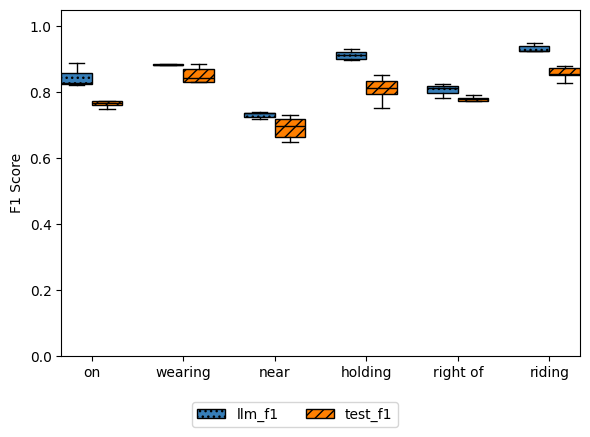

In [19]:
def plot():
    dataset = "gqa"
    method = "balanced_with_oname_box_annotated"
    udfs = ["on", "wearing", "near", "holding", "to_the_right_of", "riding"]
    labels = ["on", "wearing", "near", "holding", "right of", "riding"]
    # Create a figure and axis for the boxplot
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))  # Adjust the figsize as needed

    hatch_patterns = ['...', '///', '\\\\\\', 'xxx', 'OO', '|||', '+++']
    handles_f1 = []

    llm_f1_list = []
    test_f1_list = []
    # Iterate through LLM models
    for i, udf_class in enumerate(udfs):
        print(f"######## {udf_class} ########")
        llm_f1_data = []
        test_f1_data = []
        # Iterate through runs and questions
        for run_id in range(5):
            # try:
            with open(os.path.join(config['log_dir'], "llm_labels_relationship", dataset, method, f"udf-{udf_class}_run-{run_id}_ntrain-100.log"), "r") as f:
                # read all lines
                lines = f.readlines()
                for line in lines:
                    if "llm_f1" in line:
                        llm_f1 = re.search(r'llm_f1: (\d+\.\d+)', line).group(1)
                test_f1 = re.search(r'test_f1: (\d+\.\d+)', lines[-1]).group(1)
                print(f"llm_f1={llm_f1}, test_f1={test_f1}")
                llm_f1_data.append(float(llm_f1))
                test_f1_data.append(float(test_f1))
            # except Exception as e:
            #     print(e)
            #     continue
        llm_f1_list.append(llm_f1_data)
        test_f1_list.append(test_f1_data)

    bp_llm_f1 = ax.boxplot(llm_f1_list,
                       positions=np.array(range(len(llm_f1_list))) * 3,
                       sym='.',
                       widths=1,
                       showfliers=False,
                       patch_artist=True,
                       boxprops=dict(facecolor=CB_color_cycle[0], hatch=hatch_patterns[0]),
                       medianprops=dict(color='black'))
    bp_test_f1 = ax.boxplot(test_f1_list,
                       positions=np.array(range(len(test_f1_list))) * 3 + 1,
                       sym='.',
                       widths=1,
                       showfliers=False,
                       patch_artist=True,
                       boxprops=dict(facecolor=CB_color_cycle[1], hatch=hatch_patterns[1]),
                       medianprops=dict(color='black'))

    handles_f1 = [bp_llm_f1["boxes"][0], bp_test_f1["boxes"][0]]


    # Customize the plot labels and legend
    ax.set(ylabel="F1 Score")
    # ax.set(xlabel="UDF class")
    ax.set_ylim(bottom=0, top=1.05)
    ax.set_xticks(np.arange(0.5, len(udfs) * 3 - 2, 3))
    ax.set_xticklabels(labels)
    fig.legend(handles_f1, ['llm_f1', 'test_f1'], prop={"size": 10}, loc='upper center', bbox_to_anchor=(0.5, 0.0),
            fancybox=True, shadow=False, ncol=2)
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    plt.show()

plot()